# Matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x=[1,2,3]
y=[3,2,1]
z=[1,1,1]

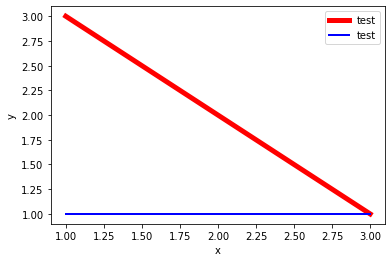

In [ ]:
plt.plot(x,y,color='red', linewidth=5, label='test')
plt.plot(y,z,color='blue', linewidth=2, label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
df.plot(x='col',y='col',kind='line',rot=45)
plt.show()

In [ ]:
df.plot(x='col',y='col',kind='scatter',rot=45)
plt.show()

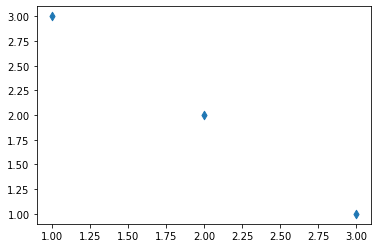

In [ ]:
plt.scatter(x,y,marker='d')

<BarContainer object of 3 artists>

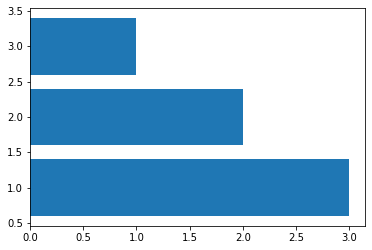

In [ ]:
plt.barh(x,y)

<BarContainer object of 3 artists>

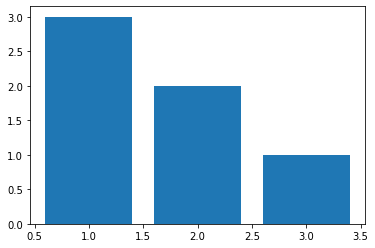

In [ ]:
plt.bar(x,y)

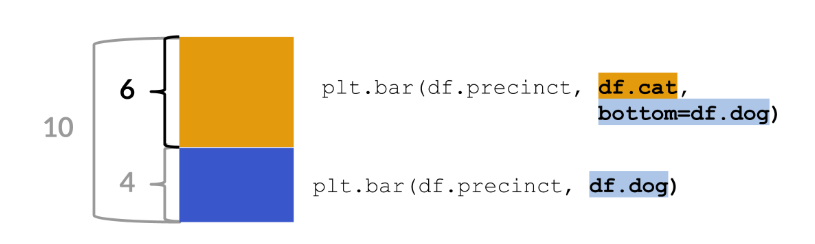

In [ ]:
df.plot(kind='bar',title='title')
plt.show()

In [ ]:
df['col'].hist(bins=5)
plt.show()

# Dictionaries

In [ ]:
dict.get()
dict.keys()
dict.update()
sorted(dict(key),reverse=True)[0] # gets the lowest ranked value in the dictionary
del dict[key]
dict.pop()
'x' in dict

Counter

In [ ]:
from collections import Counter

In [ ]:
y = Counter(x) # returns count of items in the list/dictionary
y.most_common(5) # prints 5 most common items

In [ ]:
x=((1,2,3),(4,5,6),(1,3,4))

In [ ]:
test={}
for a,b,c in x:
  if a not in test:
    test[a]=[]
  test[a].append((b,c)) 

In [ ]:
test[1]

[(2, 3), (3, 4)]

Default Dict

In [ ]:
from collections import defaultdict

In [ ]:
x=((1,2,3),(4,5,6),(1,3,4))

In [ ]:
test=defaultdict(list)

In [ ]:
for a,b,c in x:
  test[b].append(c)

In [ ]:
type(test.items())

dict_items

In [ ]:
type(list(test.items()))

list

In [ ]:
test

defaultdict(list, {2: [3], 3: [4], 5: [6]})

In [ ]:
list(test.items())[:1]

[(2, [3])]

In [ ]:
test[1]

[]

Ordered Dict

In [ ]:
from collections import OrderedDict

# Create an OrderedDict called: ridership_date
ridership_date = OrderedDict()

entries=((1,2),(4,5),(3,4))

# Iterate over the entries
for date, riders in entries:
    # If a key does not exist in ridership_date, set it to 0
    if date not in ridership_date:
        ridership_date[date] = 0
        
    # Add riders to the date key in ridership_date
    ridership_date[date] += riders
    
# Print the first 31 records
list(ridership_date.items())[:2]

[(1, 2), (4, 5)]

In [ ]:
# Print the first key in ridership_date
print(list(ridership_date.keys())[0])

# Pop the first item from ridership_date and print it
print(ridership_date.popitem(last=False))

# Print the last key in ridership_date
print(list(ridership_date.keys())[-1])

# Pop the last item from ridership_date and print it
print(ridership_date.popitem())

1
(1, 2)
3
(3, 4)


Named Tuple

In [ ]:
entries=((1,2,3),(4,5,6),(1,3,4))
# Import namedtuple from collections
from collections import namedtuple

# Create the namedtuple: DateDetails
DateDetails = namedtuple('DateDetails', ['date', 'stop', 'riders'])

# Create the empty list: labeled_entries
labeled_entries = []

# Iterate over the entries list
for date, stop, riders in entries:
    # Append a new DateDetails namedtuple instance for each entry to labeled_entries
    details = DateDetails(date, stop, riders)
    
    labeled_entries.append(details)
    
# Print the first 5 items in labeled_entries
print(labeled_entries[:2])

[DateDetails(date=1, stop=2, riders=3), DateDetails(date=4, stop=5, riders=6)]


Once you have a namedtuple, you can write more expressive code that is easier to understand. Remember, you can access the elements in the tuple by their name as an attribute. For example, you can access the date of the namedtuples in the previous exercise using the .date attribute.

Here, you'll use the tuples you made in the previous exercise to see how this works.

In [ ]:
# Iterate over the first twenty items in labeled_entries
for item in labeled_entries[:2]:
    # Print each item's stop
    print(item.stop)
    # Print each item's date
    print(item.date)
    # Print each item's riders
    print(item.riders)

2
1
3
5
4
6


# Datetime

In [ ]:
from datetime import datetime
from datetime import date
from datetime import timezone
from datetime import timedelta

In [ ]:
datetime.now()
datetime.utcnow()

datetime.datetime(2020, 6, 19, 15, 59, 23, 773157)

to get timezone of a particular place use dateutil/tz

In [ ]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = et)
  trip['end'] = trip['end'].replace(tzinfo = et)

# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

There is a difference in changing tzinfo and adjusting timezone

In [ ]:
dt.replace(tzinfo=timezone.utc)
dt.astimezone(timezone.utc) #changes offset + clock itself

In [ ]:
# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [ ]:
# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [ ]:
# Create a Timezone object for Chicago
chicago_usa_tz = timezone('US/Central')

# Create a Timezone object for New York
ny_usa_tz = timezone('US/Eastern')

# Iterate over the daily_summaries list
for orig_dt, ridership in daily_summaries:

    # Make the orig_dt timezone "aware" for Chicago
    chicago_dt = orig_dt.replace(tzinfo=chicago_usa_tz)
    
    # Convert chicago_dt to the New York Timezone
    ny_dt = chicago_dt.astimezone(ny_usa_tz)
    
    # Print the chicago_dt, ny_dt, and ridership
    print('Chicago: %s, NY: %s, Ridership: %s' % (chicago_dt, ny_dt, ridership))

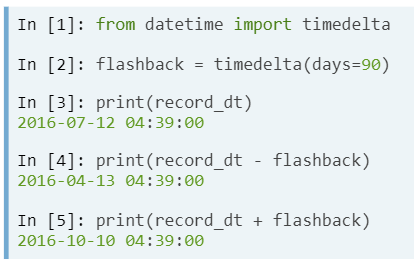

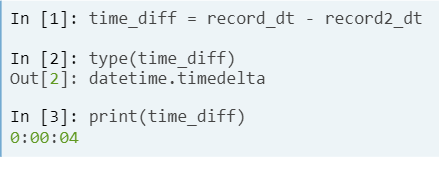

Formatting Datetime

In [ ]:
date = (YYYY,MM,DD)
date.isoformat() #YYYY-MM-DD
date.strftime("%Y%m%d")

dt = datetime.strptime(string,format) #converts string to datetime
dt = datetime(YYYY,MM,DD,HH,MIN,SEC)
dt = datetime.fromtimestamp(ts) #read unix datetime

td = timedelta()

In [ ]:
# Iterate over the dates_list 
for date_str in dates_list:
    # Convert each date to a datetime object: date_dt
    date_dt = datetime.strptime(date_str, '%m/%d/%Y')
    
    # Print each date_dt
    print(date_dt)

In [ ]:
# Assign date to get_date
get_date = datetime.now()

# Add named placeholders with format specifiers
message = "Good morning. Today is {today:%B %d, %Y}. It's {today:%H:%M} ... time to work!"

# Format date
print(message.format(today=get_date))

In [ ]:
# Loop over the first 10 items of the datetimes_list
for item in datetimes_list[:10]:
    # Print out the record as a string in the format of 'MM/DD/YYYY'
    print(item.strftime('%m/%d/%Y'))
    
    # Print out the record as an ISO standard string
    print(item.isoformat())

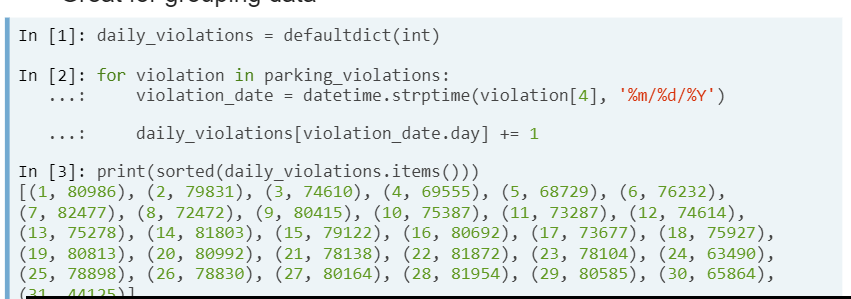

Aware(has timezone) vs Naive(no timezone) datetime

Using Pendulum

In [ ]:
pip install pendulum

     |████████████████████████████████| 153kB 2.9MB/s 
     |████████████████████████████████| 491kB 12.0MB/s 


In [ ]:
# Import the pendulum module
import pendulum

# Create a now datetime for Tokyo: tokyo_dt
tokyo_dt = pendulum.now('Asia/Tokyo')

# Covert the tokyo_dt to Los Angeles: la_dt
la_dt = tokyo_dt.in_timezone('America/Los_Angeles')

# Print the ISO 8601 string of la_dt
print(la_dt.to_iso8601_string())

2020-06-19T09:28:47.472436-07:00


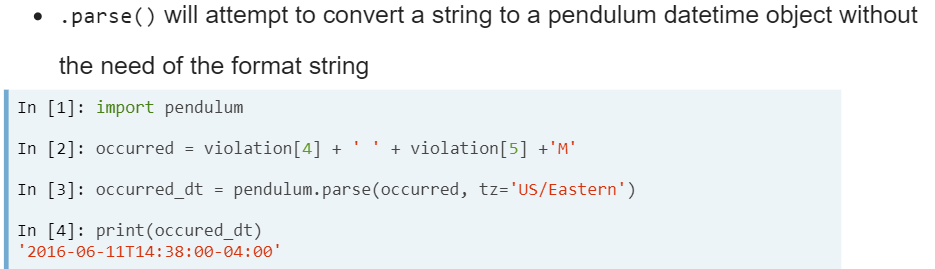

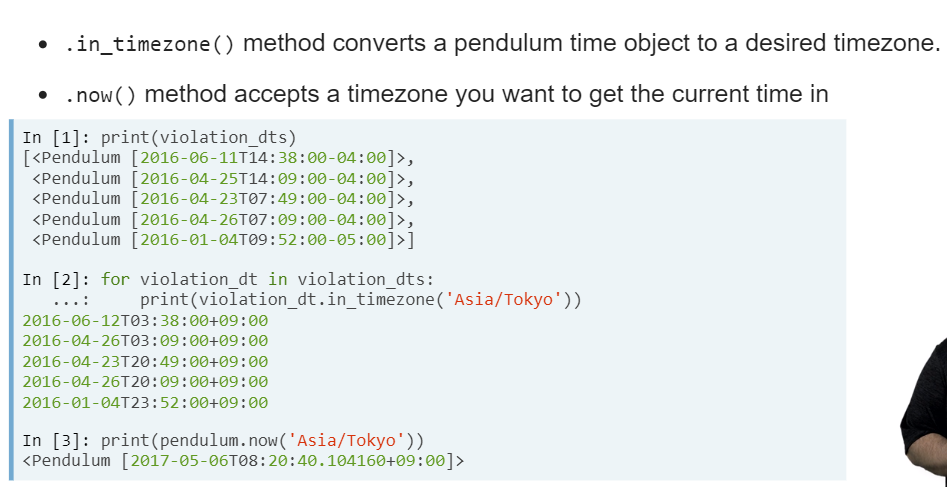

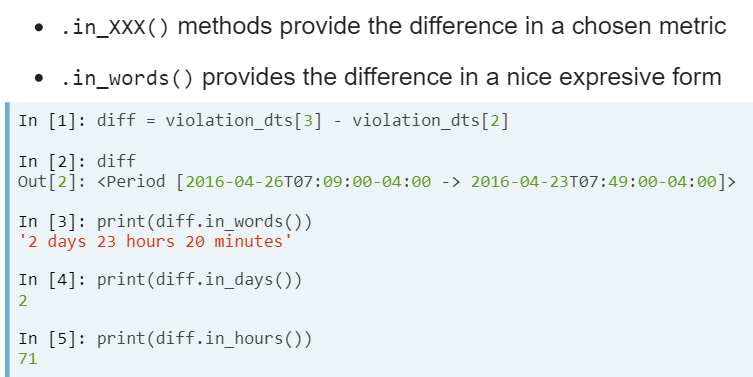

Working with Pandas

In [ ]:
# Localize the Start date column to America/New_York
# sets a timezone
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Convert the Start date column to Europe/London
# converts a timezone
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.weekday_name

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Pandas

In [ ]:
df = pd.DataFrame(dict)
df = pd.read_csv('csv')
df.to_csv('title')

In [ ]:
df.info()
df.describe()
df.head()

df.shape
df.columns
df.index
df.values #numpy array

In [ ]:
df.sort_values(['col','col2'],ascending=[True,False])
df.col
df[['col','col2']]
df[condition & condition2]
df[condition | condition2]
df['col'].isin(['condition','condition2'])

In [ ]:
df.min()
df.max()
df.var()
df.std()
df.sum()
df.cumsum(), cummax(), cummin(), cumprod()
df.mean()
df.mode()
df.median()

In [ ]:
df.drop_duplicates(subset='col')
df.value_counts(sort=True,normalize=True)

GroupBy/Pivot

In [ ]:
df.groupby('col')['col2'].sum()
df.groupby("col")[["col2", "col3"]].agg([np.min, np.max, np.mean, np.median])

In [ ]:
df.pivot_table(index='col',values='col2',columns='col3',aggfunc=[np.mean,np.median],fill_value=0,margins=True)

Index

In [ ]:
df.set_index('col')
df.reset_index(drop=True)
df.sort_index(level=['col','col2'],ascending=[True,False])

Missing Value

In [ ]:
# Check individual values for missing values
print(df.isna())
# Check each column for missing values
print(df.isna().any())
# Bar plot of missing values by variable
df.isna().sum().plot(kind="bar")
# Remove rows with missing values
df.dropna()
# Fill in missing values with 0
df.fillna(0)

# Numpy

In [ ]:
nparray = np.array(list)

# Regular Expression

working with strings

In [ ]:
.upper()
.lower()
.capitalize()
.split('$')
.rsplit(sep = ' ', maxsplit =2) # split starts from right
.splitlines()
' '.join(list)
.strip()
.lstrip()
.rstrip()

In [ ]:
string.find('Waldo') #-1 means not found
string.index('Waldo') #gives an error instead of find
string.count('Waldo')
string.replace(old,new,count)

In [ ]:
# Assign the substrings to the variables
first_pos = wikipedia_article[3:19].lower()
second_pos = wikipedia_article[21:44].lower()

# Define string with placeholders 
my_list.append("The tool {} is used in {}")

# Define string with rearranged placeholders
my_list.append("The tool {1} is used in {0}")

# Use format to print strings
for my_string in my_list:
  	print(my_string.format(first_pos, second_pos))

In [ ]:
# Create a dictionary
plan = {
  		"field": courses[0],
        "tool": courses[1]
        }

# Complete the placeholders accessing elements of field and tool keys
my_message = "If you are interested in {data[field]}, you can take the course related to {data[tool]}"

# Use dictionary to replace placeholders
print(my_message.format(data=plan))

In [ ]:
# Import datetime 
from datetime import datetime

# Assign date to get_date
get_date = datetime.now()

# Add named placeholders with format specifiers
message = "Good morning. Today is {today:%B %d, %Y}. It's {today:%H:%M} ... time to work!"

# Format date
print(message.format(today=get_date))

Good morning. Today is June 28, 2020. It's 07:42 ... time to work!


# Object Oriented Programming

In [ ]:
class Class: # from class (script) import Class (class)
  def __init__(self,attribute):
  def function(self,value):

In [ ]:
class Pants:
    """The Pants class represents an article of clothing sold in a store
    """

    def __init__(self, color, waist_size, length, price): # __ means magic method
        """Method for initializing a Pants object

        Args: 
            color (str)
            waist_size (int)
            length (int)
            price (float)

        Attributes:
            color (str): color of a pants object
            waist_size (str): waist size of a pants object
            length (str): length of a pants object
            price (float): price of a pants object
        """

        self.color = color
        self.waist_size = waist_size
        self.length = length
        self.price = price

    def change_price(self, new_price):
        """The change_price method changes the price attribute of a pants object

        Args: 
            new_price (float): the new price of the pants object

        Returns: None

        """
        self.price = new_price

    def discount(self, percentage):
        """The discount method outputs a discounted price of a pants object

        Args:
            percentage (float): a decimal representing the amount to discount

        Returns:
            float: the discounted price
        """
        return self.price * (1 - percentage)

Changing values directly prevents flexibility because the value is premanently changed. Changing via a method retains the original attribute

Following the Python convention, the underscore in front of price is to let a programmer know that price should only be accessed with get and set methods rather than accessing price directly with shirt_one._price

# Pythonic Code

Pythonic Code is efficient code

Timing

In [ ]:
#single line
%timeit -r5 -n2

#multiple lines
%%timeit -r5 -n2

#line_profiler
#memory_profiler

Numpy arrays are homogenous (i.e same datatype) and hence require less overhead needed for data type checking

Numpy arrays are vectorized automatically (broadcasting)

Numpy arrays are slightly better at indexing

In [ ]:
range(2,10,3)

range(2, 10, 3)

In [ ]:
[*range(1,12,2)] # * will unpack the range

[1, 3, 5, 7, 9, 11]

In [ ]:
listofitems = ['a','b','c']

In [ ]:
indexed_list = enumerate(listofitems, start=1)
print(list(indexed_list))

[(1, 'a'), (2, 'b'), (3, 'c')]


In [ ]:
# Rewrite the for loop to use enumerate
indexed_names = []
for i,name in enumerate(names):
    index_name = (i,name)
    indexed_names.append(index_name) 
print(indexed_names)

# Rewrite the above for loop using list comprehension
indexed_names_comp = [(i,name) for i,name in enumerate(names)]
print(indexed_names_comp)

# Unpack an enumerate object with a starting index of one
indexed_names_unpack = [*enumerate(names, 1)]
print(indexed_names_unpack)

In [ ]:
listofnumbers = [1,2,3]

In [ ]:
output = map(function, listofnumbers)
output = map(lambda x: x**2, listofnumbers)
print(list(output))

[1, 4, 9]


Alternative libraries

In [ ]:
full_list = [*zip(list1, list2)]

In [ ]:
# Import combinations from itertools
from itertools import combinations

# Create a combination object with pairs of Pokémon
combos_obj = combinations(pokemon, 2)
print(type(combos_obj), '\n')

# Convert combos_obj to a list by unpacking
combos_2 = [*combos_obj]
print(combos_2, '\n')

# Collect all possible combinations of 4 Pokémon directly into a list
combos_4 = [*combinations(pokemon, 4)]
print(combos_4)

In [ ]:
# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
both = ash_set.intersection(misty_set)
print(both)

# Find the Pokémon that Ash has and Misty does not have
ash_only = ash_set.difference(misty_set)
print(ash_only)

# Find the Pokémon that are in only one set (not both)
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)

# Convert Brock's Pokédex to a set
brock_pokedex_set = set(brock_pokedex)
print(brock_pokedex_set)

# Check if Psyduck is in Ash's list and Brock's set
print('Psyduck' in ash_pokedex)
print('Psyduck' in brock_pokedex_set)

# Check if Machop is in Ash's list and Brock's set
print('Machop' in ash_pokedex)
print('Machop' in brock_pokedex_set)

Pandas

In [ ]:
for i, row in df.iterrows():
for tuple in df.iterrows():
for namedtuple in df.itertuples(): #faster than iterrows
result = df.apply(lambda row: function(row['col']), axis=1) #axis=1 means row in apply
# use numpy arrays to speed up calculations

# numpy > iter > apply